In [104]:
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tslearn.clustering import KShape
from tslearn.neighbors import KNeighborsTimeSeries
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [4]:
year_file_path = "C:\\Users\\Mikko\\Documents\\gradu\\processing_preprocessed_images\\car_count"
files = listdir(year_file_path)

In [35]:
filename_stub = "CarCount_interval5_greyscale_lam_915"
filtered = filter(lambda path: filename_stub in path, files)

In [36]:
days = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]

In [37]:
datasets = []

for path in filtered:
    if (path[-7:-4] in days):
        datasets.append(path)

In [47]:
mon_filepath = f"{year_file_path}\\{datasets[1]}"
monday_img = Image.open(mon_filepath)

In [43]:
monday = np.array(bytearray(monday_img.tobytes()), dtype="uint8")

In [57]:
monday_data = np.transpose(monday.reshape(288, 48))

In [61]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(monday_data)
sz = X_train.shape[1]

0.002 --> 0.003 --> 


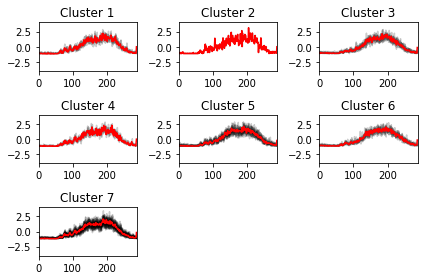

In [63]:
# kShape clustering
ks = KShape(n_clusters=7, verbose=True)
y_pred = ks.fit_predict(X_train)

plt.figure()
for yi in range(7):
    plt.subplot(3, 3, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

In [64]:
def create_data_matrix(file_path):
    img_data = Image.open(file_path)
    day_data = np.array(bytearray(img_data.tobytes()), dtype="uint8")
    return np.transpose(day_data.reshape(288, 48))    

In [77]:
data = create_data_matrix(f"{year_file_path}\\{datasets[0]}")

for i in range(1, 7):
    day_path = f"{year_file_path}\\{datasets[i]}"
    data = np.concatenate((data, create_data_matrix(day_path)))

0.018 --> 0.018 --> 


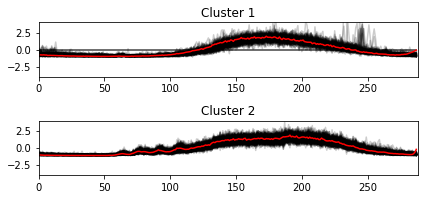

In [93]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(data)
sz = X_train.shape[1]

# kShape clustering
ks = KShape(n_clusters=2, verbose=True)
y_pred = ks.fit_predict(X_train)

plt.figure()
for yi in range(2):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

In [94]:
preds = ks.predict(data)

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 336 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [89]:
preds

['CarCount_interval5_greyscale_lam_915_year_2016_fri.bmp',
 'CarCount_interval5_greyscale_lam_915_year_2016_mon.bmp',
 'CarCount_interval5_greyscale_lam_915_year_2016_sat.bmp',
 'CarCount_interval5_greyscale_lam_915_year_2016_sun.bmp',
 'CarCount_interval5_greyscale_lam_915_year_2016_thu.bmp',
 'CarCount_interval5_greyscale_lam_915_year_2016_tue.bmp',
 'CarCount_interval5_greyscale_lam_915_year_2016_wed.bmp']

In [102]:
k = 6
preds[k*48:(k+1)*48]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

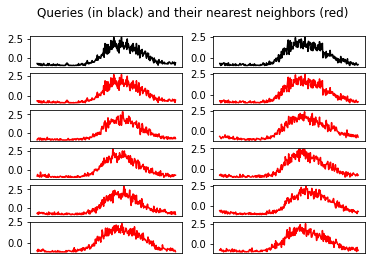

In [107]:
n_queries = 2
n_neighbors = 5

knn = KNeighborsTimeSeries(n_neighbors=n_neighbors)
knn.fit(X_train)
ind = knn.kneighbors(X_train[:n_queries], return_distance=False)

plt.figure()
for idx_ts in range(n_queries):
    plt.subplot(n_neighbors + 1, n_queries, idx_ts + 1)
    plt.plot(X_train[idx_ts].ravel(), "k-")
    plt.xticks([])
    for rank_nn in range(n_neighbors):
        plt.subplot(n_neighbors + 1, n_queries,
                    idx_ts + (n_queries * (rank_nn + 1)) + 1)
        plt.plot(X_train[ind[idx_ts, rank_nn]].ravel(), "r-")
        plt.xticks([])


plt.suptitle("Queries (in black) and their nearest neighbors (red)")
plt.show()